<a href="https://colab.research.google.com/github/allyssonendo/Soulcode-PANDAS/blob/main/PANDAS_AULA01(Atividade_airbnb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando o gcsfs


In [1]:
pip install gcsfs

In [ ]:
pip install pandera

##Importando bibliotecas

In [3]:
import pandas as pd
import pandera as pa
import numpy as np
import os
from google.cloud import storage

##Conectando com o bucket do Google Cloud




In [4]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)
#Carrega o token para o ambiente de serviço
serviceAccount = '/content/erudite-store-377820-f099033ba55b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [6]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('allyssonendo01')
bucket.blob('amsterdam_weekdays.csv')
path = 'gs://allyssonendo01/brutos/amsterdam_weekdays.csv'

##Extraindo dados do DF

In [7]:
df = pd.read_csv(path)

##Pré Análise

In [ ]:
df.head(10)

##Transformações

In [ ]:
#cria o primeiro backup de df em dfback

dfback = df.copy()
df.head(3)

In [10]:
#Drop da coluna Unnamed: 0
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [ ]:
df

In [ ]:
#attr_index	attr_index_norm	rest_index	rest_index_norm

In [12]:
#Trocando nome das coluna
df.rename(columns={'realSum':'preco_total','room_type':'tipo_quarto',	'room_shared':'quarto_compartilhado', 'room_private':'quarto_privativo',	'person_capacity':'max_pessoas'},inplace = True)
df.rename(columns={'host_is_superhost':'host_superhost',	'multi':'varios_quartos',	'biz':'uso_comercial',	'cleanliness_rating':'classificacao_limpeza'},inplace=True)
df.rename(columns={'guest_satisfaction_overall':'media_satisfacao_cliente',	'bedrooms':'quantidade_quartos',	'dist':'distancia_centro',	'metro_dist':'distancia_metro','lng':'longitude',	'lat':'latitude'},inplace=True)

In [13]:
pd.unique(df['tipo_quarto'])

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
#Cria o segundo backup do df
dfback2 = df.copy()
dfback2

In [18]:
# drop de (quarto_compartilhado	quarto_privativo) pois tipo_quarto ja possui a informação dos dois
df.drop(['quarto_compartilhado','quarto_privativo'],axis = 1,inplace=True)


In [19]:
#Validando o DF
schema = pa.DataFrameSchema(
     columns = {
        'preco_total':pa.Column(pa.Float),
        'tipo_quarto':pa.Column(pa.String),
        'max_pessoas':pa.Column(pa.Float),
        'host_superhost':pa.Column(pa.Bool),
        'varios_quartos':pa.Column(pa.Int),
        'uso_comercial':pa.Column(pa.Int),
        'classificacao_limpeza':pa.Column(pa.Float),
        'media_satisfacao_cliente':pa.Column(pa.Float),
        'quantidade_quartos':pa.Column(pa.Int),
        'distancia_centro':pa.Column(pa.Float),
        'distancia_metro':pa.Column(pa.Float),
        'longitude':pa.Column(pa.Float),
        'latitude':pa.Column(pa.Float),
     }
)

In [20]:
#Validando o Dataframe df
schema.validate(df)

,preco_total,tipo_quarto,max_pessoas,host_superhost,varios_quartos,uso_comercial,classificacao_limpeza,media_satisfacao_cliente,quantidade_quartos,distancia_centro,distancia_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude
0,194.033698,quarto_privativo,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,quarto_privativo,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,quarto_privativo,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,quarto_privativo,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,quarto_privativo,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,casa_inteira/apartamento,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,quarto_privativo,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,quarto_privativo,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,casa_inteira/apartamento,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


<Axes: xlabel='tipo_quarto'>

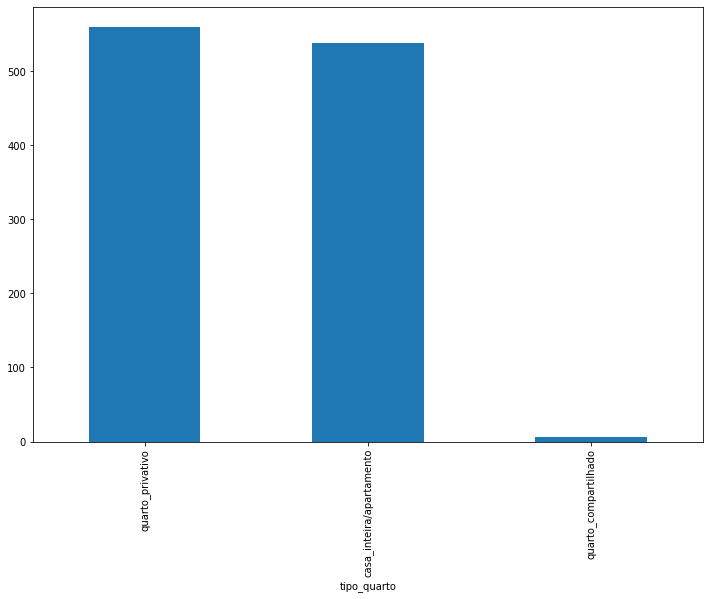

In [21]:
df.groupby('tipo_quarto',dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8))

<Axes: ylabel='None'>

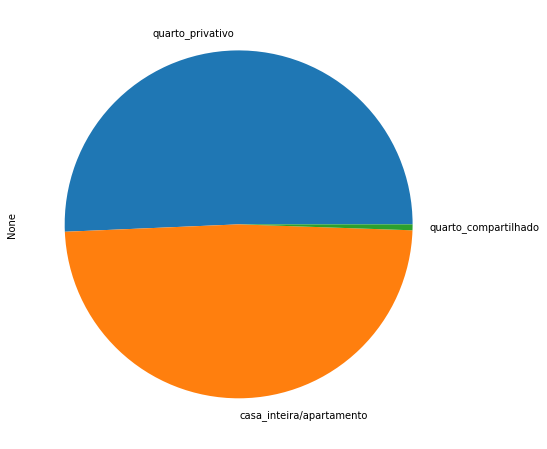

In [22]:
df.groupby('tipo_quarto',dropna=False).size().sort_values(ascending=False).plot.pie(figsize=(12,8))

<Axes: xlabel='tipo_quarto'>

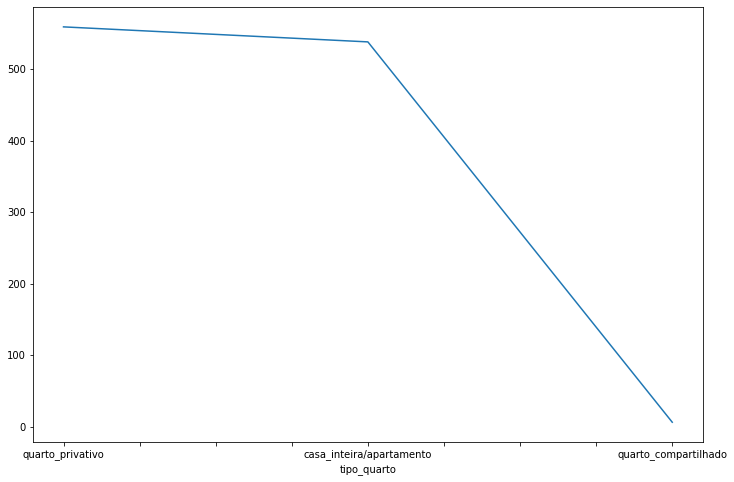

In [23]:
df.groupby('tipo_quarto',dropna=False).size().sort_values(ascending=False).plot.line(figsize=(12,8))